In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [3]:
connection = create_server_connection("localhost", "root", "259604")

MySQL Database connection successful


In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [5]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

In [6]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [7]:
dadosEstudantes = []
colunas = ["Matrículas", "Status", "Estudante", "Disciplina"]

In [8]:
q1 = """
select distinct Matriculas, Status, IDEstudante, IDDisciplina from(
	select distinct * from student_data.dados 
	inner join student_data.fluxos on
	student_data.dados.IDFluxo =  student_data.fluxos.Fluxo where Abrev = "AEROESPACIAL") igualarFluxo;
"""

connection = create_db_connection("localhost", "root", "259604", "student_data")
results = read_query(connection, q1)

for result in results:
  dadosEstudantes.append(result)

MySQL Database connection successful


In [9]:
df = pd.DataFrame(dadosEstudantes, columns = colunas)

df.head()

,Matrículas,Status,Estudante,Disciplina
0,1,1,27990,ENM0068
1,1,1,27990,ENM0071
2,1,1,27990,FGA0008
3,1,1,27990,FGA0021
4,1,1,27990,FGA0037


In [10]:
df.dtypes

Matrículas     int64
Status         int64
Estudante      int64
Disciplina    object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15075 entries, 0 to 15074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Matrículas  15075 non-null  int64 
 1   Status      15075 non-null  int64 
 2   Estudante   15075 non-null  int64 
 3   Disciplina  15075 non-null  object
dtypes: int64(3), object(1)
memory usage: 471.2+ KB


In [12]:
df['Status'].unique()

array([1, 2, 5], dtype=int64)

In [13]:
df15 = df.drop(df[df.Status == 2].index).copy()
df15.head()

,Matrículas,Status,Estudante,Disciplina
0,1,1,27990,ENM0068
1,1,1,27990,ENM0071
2,1,1,27990,FGA0008
3,1,1,27990,FGA0021
4,1,1,27990,FGA0037


In [15]:
df15['Status'].unique()

array([1, 5], dtype=int64)

In [16]:
df1 = df.drop(df[df.Status == 1].index).copy()
df1.head()

,Matrículas,Status,Estudante,Disciplina
2866,1,2,27991,CIC0007
2867,1,2,27991,ENM0068
2868,1,2,27991,ENM0071
2869,1,2,27991,ENM0080
2870,1,2,27991,FGA0008


In [17]:
df1['Status'].unique()

array([2, 5], dtype=int64)

In [18]:
df2 = df1.drop(df[df.Status == 5].index).copy()
df2.head()

,Matrículas,Status,Estudante,Disciplina
2866,1,2,27991,CIC0007
2867,1,2,27991,ENM0068
2868,1,2,27991,ENM0071
2869,1,2,27991,ENM0080
2870,1,2,27991,FGA0008


In [19]:
df2['Status'].unique()

array([2], dtype=int64)

In [20]:
X = df15.drop(['Status'], axis=1).copy()
X.head()

,Matrículas,Estudante,Disciplina
0,1,27990,ENM0068
1,1,27990,ENM0071
2,1,27990,FGA0008
3,1,27990,FGA0021
4,1,27990,FGA0037


In [22]:
y = df15['Status'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

In [63]:
y.unique()

array([1, 5], dtype=int64)

In [23]:
X2 = df2.drop(['Status'], axis=1).copy()
X2.head()

,Matrículas,Estudante,Disciplina
2866,1,27991,CIC0007
2867,1,27991,ENM0068
2868,1,27991,ENM0071
2869,1,27991,ENM0080
2870,1,27991,FGA0008


In [24]:
y2 = df2['Status'].copy()
y2.head()

2866    2
2867    2
2868    2
2869    2
2870    2
Name: Status, dtype: int64

In [25]:
y2.unique()

array([2], dtype=int64)

In [27]:
X_encoded = pd.get_dummies(X, columns=['Disciplina'])
X_encoded.head()

,Matrículas,Estudante,Disciplina_ADM0023,Disciplina_CIC0004,Disciplina_CIC0007,Disciplina_CIC0088,Disciplina_DEG0204,Disciplina_ENE0277,Disciplina_ENM0068,Disciplina_ENM0070,...,Disciplina_MAT0010,Disciplina_MAT0024,Disciplina_MAT0025,Disciplina_MAT0026,Disciplina_MAT0027,Disciplina_MAT0030,Disciplina_MAT0031,Disciplina_MAT0048,Disciplina_MAT0053,Disciplina_MAT0059
0,1,27990,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,27990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X2_encoded = pd.get_dummies(X2, columns=['Disciplina'])
X2_encoded.head()

,Matrículas,Estudante,Disciplina_ADM0023,Disciplina_ADM0092,Disciplina_CIC0004,Disciplina_CIC0007,Disciplina_CIC0088,Disciplina_CIC0090,Disciplina_CIC0197,Disciplina_DEG0204,...,Disciplina_MAT0010,Disciplina_MAT0024,Disciplina_MAT0025,Disciplina_MAT0026,Disciplina_MAT0027,Disciplina_MAT0030,Disciplina_MAT0031,Disciplina_MAT0038,Disciplina_MAT0053,Disciplina_MAT0137
2866,1,27991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2867,1,27991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2868,1,27991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2869,1,27991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2870,1,27991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(X_encoded)

4967

In [30]:
len(y)

4967

In [31]:
len(X2_encoded)

10108

In [32]:
len(y2)

10108

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

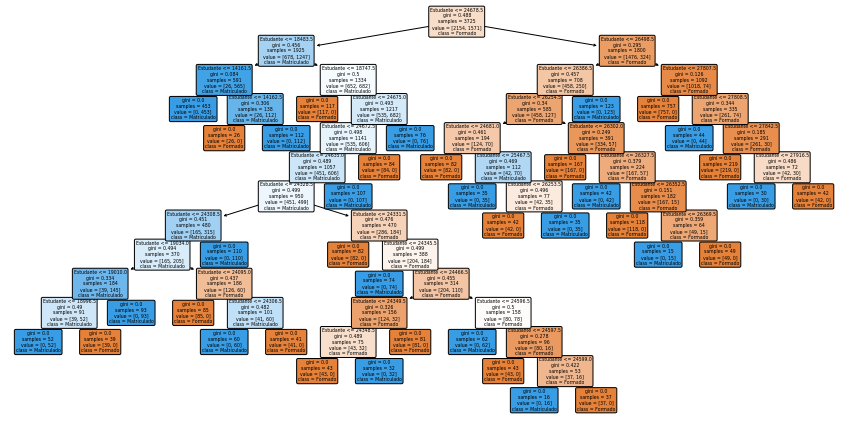

In [34]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True,
        class_names=["Formado", "Matrículado", "Evadido"],
        feature_names=X_encoded.columns);

<AxesSubplot:xlabel='tree'>

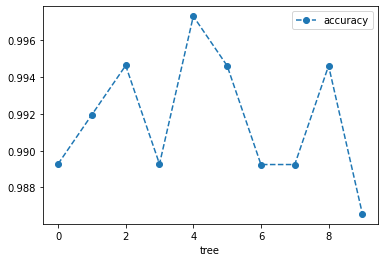

In [35]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.004)
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [36]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

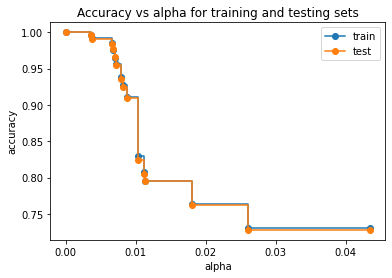

In [37]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label ="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

<AxesSubplot:xlabel='alpha'>

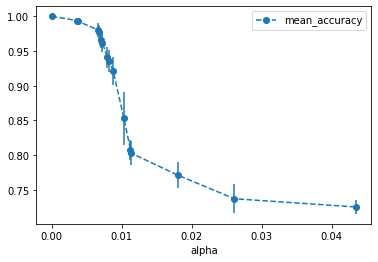

In [38]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                            columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                    y='mean_accuracy',
                    yerr='std',
                    marker='o',
                    linestyle='--')

In [39]:
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           1       0.81      0.69      0.74       712
           5       0.65      0.78      0.71       530

    accuracy                           0.73      1242
   macro avg       0.73      0.74      0.73      1242
weighted avg       0.74      0.73      0.73      1242



In [40]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, random_state=42)

In [42]:
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X2_test)
print("Classification report - \n", classification_report(y2_test,y_pred))

c:\Users\amand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Disciplina_ADM0092
- Disciplina_CIC0090
- Disciplina_CIC0197
- Disciplina_DEG0232
- Disciplina_ENC0035
- ...
Feature names seen at fit time, yet now missing:
- Disciplina_FGA0016
- Disciplina_FGA0077
- Disciplina_FGA0145
- Disciplina_FGA0159
- Disciplina_FGA0180
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 202 features, but DecisionTreeClassifier is expecting 172 features as input.